# Финальный проект. Промышленность. Предсказание температуры сплава

Цель - предсказать температуру стали. Задача регрессии

Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
def review(df):
    print('Строк в датафрейме:', df.shape[0])
    print('Столбцов в датафрейме:', df.shape[1])
    display(df.head(30))
    display(df.tail(30))
    display(df.info())
    display(df.describe())
    display(df.isna().agg(['sum', 'mean']).transpose().sort_values(by='mean', ascending=False))

## Данные об электродах

Они установлены в крышке ковша и подогревают до нужной температуры расплавленную сталь в ковше

In [3]:
def try_open(filename, dates=False):
    path_yandex = '/datasets/'   

    if os.path.exists(filename):
        df = pd.read_csv(filename, parse_dates=dates)
    elif os.path.exists(path_yandex + filename):
        df = pd.read_csv(path_yandex + filename, parse_dates=dates)
    else:
        print('Ошибка в считывании данных')
    return df

arc = try_open('data_arc_new.csv', [1, 2])
review(arc)

Строк в датафрейме: 14876
Столбцов в датафрейме: 5


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
14846,3235,2019-09-06 10:36:19,2019-09-06 10:38:08,0.702416,0.482357
14847,3235,2019-09-06 10:47:00,2019-09-06 10:49:51,0.933416,0.669493
14848,3236,2019-09-06 10:55:50,2019-09-06 10:57:38,0.794009,0.605812
14849,3236,2019-09-06 11:01:02,2019-09-06 11:04:04,1.220451,0.810976
14850,3237,2019-09-06 11:31:25,2019-09-06 11:33:24,0.362103,0.309491
14851,3237,2019-09-06 11:35:48,2019-09-06 11:39:50,1.090839,0.878488
14852,3237,2019-09-06 11:41:17,2019-09-06 11:45:12,0.223120,0.172958
14853,3237,2019-09-06 11:46:32,2019-09-06 11:49:29,0.387696,0.300067
14854,3237,2019-09-06 11:51:39,2019-09-06 11:53:55,0.478114,0.364413
14855,3238,2019-09-06 12:16:25,2019-09-06 12:18:16,0.491661,0.408998


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


None

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


,sum,mean
key,0.0,0.0
Начало нагрева дугой,0.0,0.0
Конец нагрева дугой,0.0,0.0
Активная мощность,0.0,0.0
Реактивная мощность,0.0,0.0


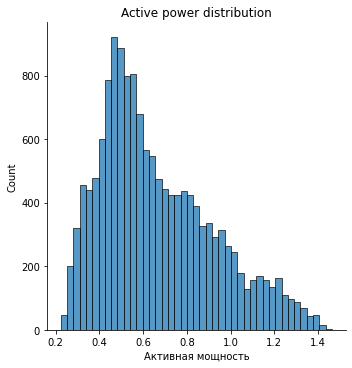

In [5]:
sns.displot(arc['Активная мощность'])
plt.title('Active power distribution');

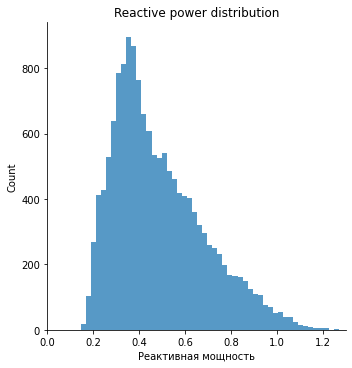

In [6]:
sns.displot(arc['Реактивная мощность'])
plt.title('Reactive power distribution')
plt.xlim(0, 1.3);

In [7]:
arc[arc['Реактивная мощность'] < 0]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


In [8]:
arc['key'].nunique()

3214

In [9]:
arc['Начало нагрева дугой'].is_monotonic_increasing

True

In [10]:
arc['Конец нагрева дугой'].is_monotonic_increasing

True

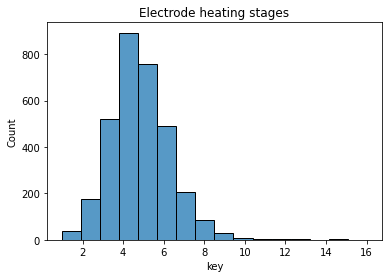

In [11]:
sns.histplot(arc['key'].value_counts(), bins=16)
plt.title('Electrode heating stages');

- Пропусков нет 
- Значение -715 в Реактивной мощности выглядит как аномалия. Такой случай всего один, я бы его удалила. Нужно ли удалять всю партию, или достаточно этого этапа нагрева?
- Есть данные о 3214 партиях
- Есть данные с 3 мая по 6 сентября, временные ряды (начало и конец нагрева) монотонно возрастают
- Номер последней партии - 3241, значит, не все числа подряд присутствуют в нумерации партий, есть пропуски
- Если судить по началу и концу, партии идут друг за другом и не пересекаются во времени. Нагрев следующей не начинается, пока не закончатся все этапы нагрева предыдущей
- Может быть от 1 до (в редких случаях) 16 этапов нагрева, чаще всего 4, распределение выглядит нормальным
- График активной мощности скошен справа. Среднее - 0.66, медиана - 0.60, пик - еще левее, в районе 0.5
- Медиана и среднее реактивной мощности почти равны - 0.44, пик левее, около 0.35
- Почему график реактивной мощности строится дольше минуты?
- Возможно, следует написать названия столбцов латиницей - с ними будет удобнее работать
- Что будет одним наблюдением для модели: одна строка, например, в этом датасете, или одна партия? Склоняюсь ко второму варианту. Тогда из данных надо будет получить какие-то сводные фичи. Средние мощности и количество нагревов? Может быть, продолжительность нагрева?

In [12]:
arc = arc.drop(9780, axis=0)    # дропнем выброс

In [13]:
arc.corr()

,key,Активная мощность,Реактивная мощность
key,1.000000,-0.010226,-0.013169
Активная мощность,-0.010226,1.000000,0.966373
Реактивная мощность,-0.013169,0.966373,1.000000


## Данные о сыпучих материалах

Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»). 

Здесь именно сыпучие материалы, проволочные - в других файлах

In [14]:
bulk = try_open('data_bulk_new.csv')
review(bulk)

Строк в датафрейме: 3129
Столбцов в датафрейме: 16


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3099,3211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,NaN,98.0,106.0
3100,3212,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3101,3213,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,NaN,98.0,108.0
3102,3214,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3103,3215,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3104,3217,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.0,NaN,150.0,158.0
3105,3218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416.0,NaN,196.0,264.0
3106,3219,NaN,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,154.0,158.0
3107,3220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,204.0,156.0
3108,3221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366.0,NaN,206.0,264.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


,sum,mean
Bulk 8,3128.0,0.999680
Bulk 13,3111.0,0.994247
Bulk 9,3110.0,0.993928
Bulk 2,3107.0,0.992969
Bulk 7,3104.0,0.992010
Bulk 5,3052.0,0.975391
Bulk 10,2953.0,0.943752
Bulk 11,2952.0,0.943432
Bulk 1,2877.0,0.919463
Bulk 6,2553.0,0.815916


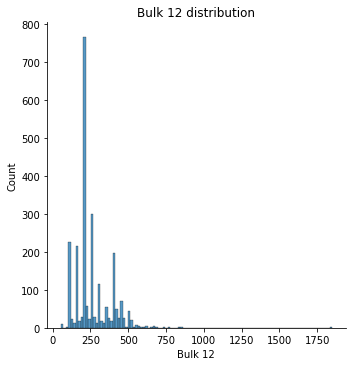

In [15]:
sns.displot(bulk['Bulk 12'])
plt.title('Bulk 12 distribution');

In [16]:
bulk[bulk['Bulk 12'] > 1000]

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
303,322,185.0,NaN,101.0,58.0,NaN,NaN,406.0,NaN,NaN,NaN,NaN,1849.0,NaN,636.0,NaN


In [17]:
bulk.isna().sum(axis=1).sort_values(ascending=False)

1177    14
1109    14
1112    14
1113    14
2228    14
        ..
3014     9
846      9
1368     9
2703     9
1699     8
Length: 3129, dtype: int64

- Я понимаю, что 15 столбцов - это некоторые сыпучие материалы. Если на пересечении партии стали и вида материала стоит НаН - этот материал не добавлялся. Можно будет заменить пропуски нулями
- Востребованность у разных материалов не одинаковая. Так материал 14 использовался в 2806 партиях (90%), а материал 8 - только в одной
- Нужно посмотреть, сколько всего получится фичей. Возможно мы удалим материалы, которые не используются в 99% партий (таких 5). 
- Значение 1849 в Bulk 12 кажется аномалией. Оно единственное больше 1000
- Вообще что в этом датасете считать аномалиями? При нормальном распределении 99.9% выборки лежит на расстоянии не более 3 сигм от середины. Но здесь распределение явно не нормальное
- Здесь 3129 партий, меньше, чем в датасете про электроды. Первая и последняя партия совпадают
- Максимальное число пропусков (нулей) в строке - 14. Значит, в каждую партию добавлялся хотя бы один материал. Может ли быть, что в партии, которых здесь нет, ничего не добавлялось?

In [18]:
bulk_time = try_open('data_bulk_time_new.csv', list(range(1, 16)))
review(bulk_time)

Строк в датафрейме: 3129
Столбцов в датафрейме: 16


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47
5,6,NaT,NaT,NaT,2019-05-03 13:57:27,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:48:52,NaT,2019-05-03 14:09:42,2019-05-03 14:03:15
6,7,NaT,NaT,NaT,2019-05-03 14:18:58,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 14:41:26,NaT,2019-05-03 14:30:50,2019-05-03 14:27:16
7,8,NaT,NaT,NaT,2019-05-03 15:17:58,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 15:17:58,NaT,2019-05-03 15:13:18,2019-05-03 15:05:33
8,9,NaT,NaT,NaT,2019-05-03 16:03:08,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 16:03:08,NaT,2019-05-03 16:00:16,2019-05-03 15:52:39
9,10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 16:38:11,NaT,2019-05-03 16:34:24,2019-05-03 16:29:56


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3099,3211,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-05 15:08:14,NaT,2019-09-05 15:03:44,2019-09-05 14:57:18
3100,3212,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-05 16:39:32,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3101,3213,NaT,NaT,2019-09-05 17:19:21,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-05 17:15:21,NaT,2019-09-05 17:10:22,2019-09-05 17:06:11
3102,3214,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-05 18:40:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3103,3215,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-05 19:07:49,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3104,3217,NaT,NaT,2019-09-05 20:33:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-05 20:33:39,NaT,2019-09-05 20:26:00,2019-09-05 20:22:56
3105,3218,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-05 20:40:37,NaT,2019-09-05 20:57:36,2019-09-05 21:03:37
3106,3219,NaT,NaT,2019-09-05 22:12:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-05 22:12:05,NaT,2019-09-05 22:00:31,2019-09-05 21:51:30
3107,3220,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-05 23:03:35,NaT,2019-09-05 22:57:48,2019-09-05 22:43:38
3108,3221,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-09-06 00:00:36,NaT,2019-09-05 23:57:20,2019-09-05 23:50:26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


None

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


,sum,mean
Bulk 8,3128.0,0.999680
Bulk 13,3111.0,0.994247
Bulk 9,3110.0,0.993928
Bulk 2,3107.0,0.992969
Bulk 7,3104.0,0.992010
Bulk 5,3052.0,0.975391
Bulk 10,2953.0,0.943752
Bulk 11,2952.0,0.943432
Bulk 1,2877.0,0.919463
Bulk 6,2553.0,0.815916


- Количество партий и доля пропусков здесь точно совпадают с предыдущим датасетом
- Отметке с объемом вещества в предыдущей таблице здесь соответствует метка времени
- Можно сопоставить все три таблицы. Например, вот что происходило с партией 1:
    - Нагревали с 11:02 до 11:06
    - Нагревали с 11:07 до 11:10
    - Добавили В15
    - Нагревали с 11:11 до 11:14
    - Добавили В14
    - Нагревали с 11:18 до 11:24
    - Добавили В12
    - Нагревали с 11:26 до 11:28
    - Добвили В4
- Вещества добавляются между сеансами нагрева
- Одно вещество добавляется один раз. Иначе могло бы быть больше одной строки на партию
- Между нагревами может ничего не добавляться
- Я не совсем понимаю, как время добавления вещества превратить в фичу. Только если как-то привязать его к началу или концу обработки партии. Или это лишняя информация, которую мы не можем использовать в модели?

In [19]:
bulk = bulk.drop(303, axis=0)
bulk.shape

(3128, 16)

## Данные о проволочных материалах

Аналогично предыдущему пункту, только про проволоку

In [20]:
wire = try_open('data_wire_new.csv')
review(wire)

Строк в датафрейме: 3081
Столбцов в датафрейме: 10


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3051,3212,7.119840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3052,3213,166.246079,10.073440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3053,3214,5.023200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3054,3215,4.062240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3055,3216,103.084801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3056,3217,85.132317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3057,3218,138.247193,10.073440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3058,3219,104.002083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,3220,88.058876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060,3221,125.055840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


,sum,mean
Wire 5,3080.0,0.999675
Wire 7,3070.0,0.996430
Wire 4,3067.0,0.995456
Wire 8,3062.0,0.993833
Wire 9,3052.0,0.990587
Wire 3,3018.0,0.979552
Wire 6,3008.0,0.976306
Wire 2,2002.0,0.649789
Wire 1,26.0,0.008439
key,0.0,0.000000


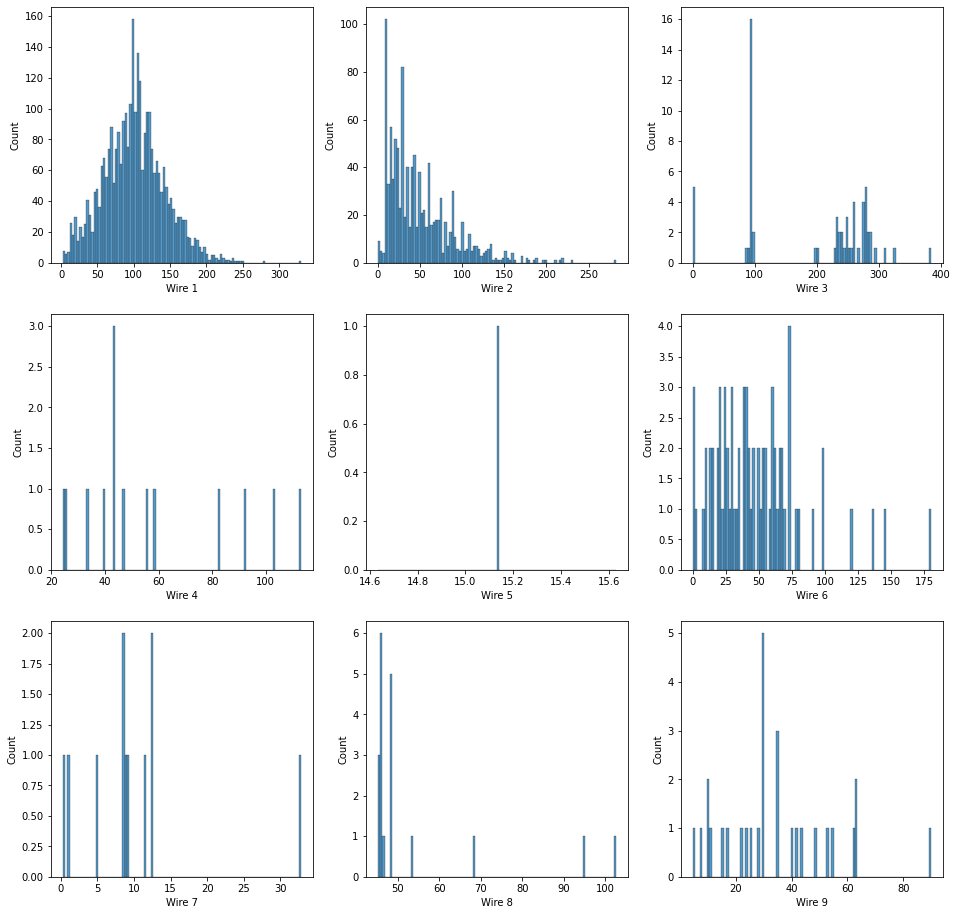

In [21]:
fig, axes = plt.subplots(3, 3, figsize = (16, 16))
for i in range(1, 10):
    sns.histplot(data=wire['Wire '+str(i)], ax=axes[(i-1)//3, (i-1)%3], bins=100);

- 5 из 9 видов проволоки применялись менее, чем в 1% партий. Удалить такой признак в связи с низкой вариативностью?
- Здесь 3081 партия, еще меньше, чем в сыпучих материалах. Вообще, если мы посмотрим на первые и последние строки этих датафреймов, видно, что пропусков в них нет. Пропуски где-то в середине. А если это не рандомные партии, а пропущен целый кусок? Нужно найти, какие партии пропущены (см. далее Анализ пропущенных номеров партий)
- Проволока 1 добавлялась практически во все партии, а проволока 5 - только один раз

In [22]:
wire_time = try_open('data_wire_time_new.csv', list(range(1, 10)))
review(wire_time)

Строк в датафрейме: 3081
Столбцов в датафрейме: 10


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,6,2019-05-03 13:57:27,2019-05-03 13:48:52,NaT,NaT,NaT,NaT,NaT,NaT,NaT
6,7,2019-05-03 14:18:58,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7,8,2019-05-03 15:01:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
8,9,2019-05-03 15:45:44,2019-05-03 15:39:37,NaT,NaT,NaT,NaT,NaT,NaT,NaT
9,10,2019-05-03 16:27:00,2019-05-03 16:22:36,NaT,NaT,NaT,NaT,NaT,NaT,NaT


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3051,3212,2019-09-05 16:36:49,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3052,3213,2019-09-05 16:51:32,2019-09-05 16:45:51,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3053,3214,2019-09-05 18:36:53,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3054,3215,2019-09-05 19:04:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3055,3216,2019-09-05 19:29:01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3056,3217,2019-09-05 20:16:07,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3057,3218,2019-09-05 20:57:36,2019-09-05 20:40:37,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3058,3219,2019-09-05 21:43:16,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3059,3220,2019-09-05 22:31:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3060,3221,2019-09-05 23:38:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


None

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


,sum,mean
Wire 5,3080.0,0.999675
Wire 7,3070.0,0.996430
Wire 4,3067.0,0.995456
Wire 8,3062.0,0.993833
Wire 9,3052.0,0.990587
Wire 3,3018.0,0.979552
Wire 6,3008.0,0.976306
Wire 2,2002.0,0.649789
Wire 1,26.0,0.008439
key,0.0,0.000000


- Как и в предыдущей паре, здесь определенному виду добавок соответствует время их введения 
- Можно теперь дополнить историю партии 1:
    - Нагревали с 11:02 до 11:06
    - <b>Добавили проволоку 1</b>
    - Нагревали с 11:07 до 11:10
    - Добавили В15
    - Нагревали с 11:11 до 11:14
    - Добавили В14
    - Нагревали с 11:18 до 11:24
    - Добавили В12
    - Нагревали с 11:26 до 11:28
    - Добвили В4
- Между сеансами нагрева всегда что-то вводится? Мы конечно не будем вручную проверять все партии, но посмотрим еще на одну для понимания. Номер 3241:
    - Нагревали с 16:49 до 16:51
    - Нагревали с 16:55 до 16:58
    - Нагревали с 17:06 до 17:09
    - Добавили проволоку 1
    - Нагревали с 17:21 до 17:22
    - Добавили В15
    - Нагревали с 17:24 до 17:26
    - Добвили В14
- Есть перерывы между нагревами, когда не вводится ни проволока, ни сыпучий материал

## Данные о продувке сплава газом

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

In [23]:
gas = try_open('data_gas_new.csv')
review(gas)

Строк в датафрейме: 3239
Столбцов в датафрейме: 2


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


,key,Газ 1
3209,3212,2.283517
3210,3213,7.167433
3211,3214,2.238245
3212,3215,3.129189
3213,3216,5.667416
3214,3217,6.537594
3215,3218,7.680754
3216,3219,6.831740
3217,3220,12.035302
3218,3221,7.321760


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


,sum,mean
key,0.0,0.0
Газ 1,0.0,0.0


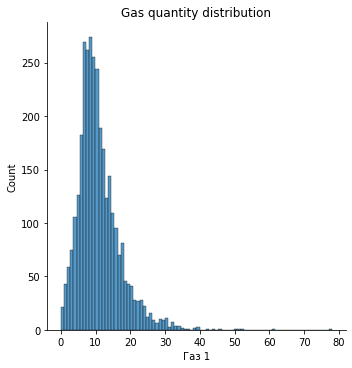

In [24]:
sns.displot(gas['Газ 1'])
plt.title('Gas quantity distribution');

In [25]:
gas[gas['Газ 1'] > 40]

,key,Газ 1
116,117,50.581035
277,280,60.935689
319,322,77.995040
660,663,41.854643
1461,1464,43.655411
2105,2108,45.638999
2107,2110,52.142373
2567,2570,51.380229


- Здесь всего один столбец с количеством газа
- 3239 строк, больше, чем в предыдущих датафреймах. Если у нас есть партии с номерами от 1 до 3241, то здесь пропущены всего две партии. Посмотрим ниже, в анализе пропущенных номеров
- Здесь распределение больше похоже на нормальное, чем в предыдущих примерах. Средее - 11, медиана - 10, пик где-то рядом с ними. График слегка скошен справа
- Считать ли 8 значений больше 40 выбросами? Удалить?

## Анализ пропущенных номеров партий

In [26]:
def find_missing(df):
    """  
    Функция принимает на вход датафрейм, выдает номера пропущенных партий из столбца keys

    """ 
    return np.array(sorted(set(range(1, 3242)) - set(df['key'])))

def missing_diff(df1, df2):
    """  
    Функция принимает на вход два датафрейма и выдает два вектора.
    В первом номера партий, пропущенные в первом ДФ, но присутствующие во втором;
    во втором - наоборот

    """ 
    missing1 = set(range(1, 3242)) - set(df1['key'])
    missing2 = set(range(1, 3242)) - set(df2['key'])
    
    return (np.array(sorted(missing1 - missing2)), np.array(sorted(missing2 - missing1)))

def np_encode(a):
    """  
    Функция принимает на вход вектор отсортированных в порядке убывания чисел. 
    Выдает два вектора: в первом - первое число в последовательности чисел, идущих подряд,
    во втором - длины последовательностей

    """ 
    mask = np.zeros(a.size)
    shifted = np.roll(a, 1)
    mask = (a != (shifted + 1))
    mask[0] = True
    result1 = (a[mask])
    mask = mask.astype(int)
    nonzero = mask.nonzero()
    diff = np.diff(nonzero)
    last = len(a) - nonzero[0][-1]
    result2 = np.append(diff, last)
    return (result1, result2)



In [27]:
find_missing(wire)

array([  41,   42,   51,   52,   53,   54,   55,   56,   81,   82,   83,
         84,   85,   88,  109,  195,  197,  209,  210,  211,  212,  269,
        330,  331,  332,  355,  375,  376,  377,  378,  382,  506,  529,
        540,  607,  683,  710,  711,  712,  713,  714,  715,  744,  748,
        754,  755,  766,  796,  797,  798,  799,  800,  841,  929,  930,
        931,  932,  933,  934, 1102, 1103, 1104, 1105, 1106, 1107, 1133,
       1184, 1300, 1379, 1380, 1437, 1525, 1526, 1527, 1528, 1564, 1565,
       1566, 1646, 1743, 1744, 1745, 1746, 1747, 1748, 1758, 1817, 1818,
       1836, 1946, 1977, 1978, 1979, 2010, 2031, 2043, 2103, 2195, 2196,
       2197, 2198, 2214, 2215, 2216, 2217, 2218, 2219, 2236, 2238, 2278,
       2356, 2360, 2367, 2368, 2369, 2370, 2373, 2388, 2389, 2390, 2391,
       2392, 2393, 2446, 2469, 2491, 2624, 2625, 2626, 2627, 2628, 2629,
       2683, 2788, 2789, 2790, 2791, 2792, 2814, 2815, 2846, 2847, 2848,
       2849, 2850, 2863, 2871, 2872, 2873, 2874, 28

In [28]:
find_missing(gas)

array([193, 259])

In [29]:
np_encode(find_missing(wire))

(array([  41,   51,   81,   88,  109,  195,  197,  209,  269,  330,  355,
         375,  382,  506,  529,  540,  607,  683,  710,  744,  748,  754,
         766,  796,  841,  929, 1102, 1133, 1184, 1300, 1379, 1437, 1525,
        1564, 1646, 1743, 1758, 1817, 1836, 1946, 1977, 2010, 2031, 2043,
        2103, 2195, 2214, 2236, 2238, 2278, 2356, 2360, 2367, 2373, 2388,
        2446, 2469, 2491, 2624, 2683, 2788, 2814, 2846, 2863, 2871, 3035,
        3200, 3207]),
 array([2, 6, 5, 1, 1, 1, 1, 4, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 6, 1, 1, 2,
        1, 5, 1, 6, 6, 1, 1, 1, 2, 1, 4, 3, 1, 6, 1, 2, 1, 1, 3, 1, 1, 1,
        1, 4, 6, 1, 1, 1, 1, 1, 4, 1, 6, 1, 1, 1, 6, 1, 5, 2, 5, 1, 6, 6,
        1, 1]))

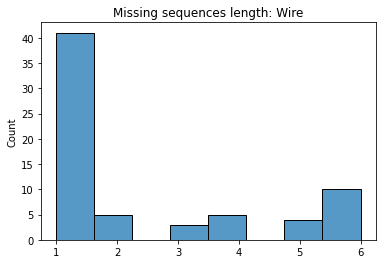

In [30]:
sns.histplot(np_encode(find_missing(wire))[1])
plt.title('Missing sequences length: Wire');

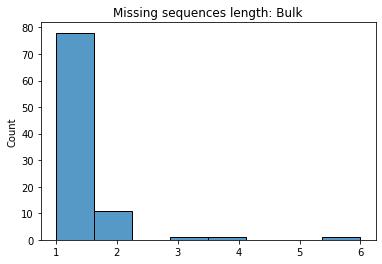

In [31]:
sns.histplot(np_encode(find_missing(bulk))[1])
plt.title('Missing sequences length: Bulk');

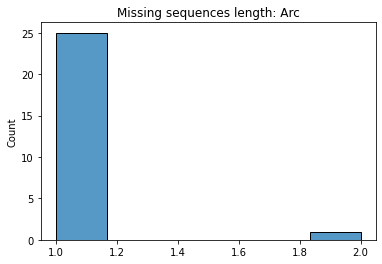

In [32]:
sns.histplot(np_encode(find_missing(arc))[1])
plt.title('Missing sequences length: Arc');

In [33]:
missing_diff(wire, bulk)

(array([  82,   83,   84,   85,   88,  109,  197,  209,  210,  211,  212,
         375,  376,  377,  378,  711,  712,  713,  714,  715,  744,  748,
         754,  755,  796,  797,  798,  799,  800,  841,  929,  930,  932,
        1102, 1103, 1104, 1106, 1107, 1184, 1379, 1380, 1525, 1526, 1527,
        1528, 1564, 1565, 1646, 1743, 1744, 1745, 1746, 1747, 1748, 1758,
        1817, 1836, 1946, 1977, 1978, 2214, 2215, 2218, 2219, 2236, 2238,
        2360, 2367, 2368, 2369, 2370, 2388, 2389, 2391, 2392, 2393, 2624,
        2626, 2627, 2629, 2788, 2789, 2790, 2791, 2792, 2814, 2815, 2846,
        2847, 2848, 2849, 2850, 2871, 2872, 2873, 2874, 2875, 2876, 3035,
        3036, 3037, 3038, 3039, 3040]),
 array([  72,   80,  110,  151,  188,  225,  302,  322,  343,  350,  661,
         830,  874,  960,  961,  964,  966,  983,  984, 1062, 1221, 1268,
        1334, 1402, 1517, 1518, 1535, 1623, 1656, 1783, 1911, 1959, 1974,
        2009, 2056, 2231, 2310, 2408, 2434, 2460, 2468, 2471, 2595, 2599

In [34]:
missing_diff(wire, arc)

(array([  51,   52,   53,   54,   55,   56,   81,   82,   83,   84,   85,
          88,  109,  197,  209,  210,  211,  212,  269,  330,  331,  332,
         375,  376,  377,  378,  711,  712,  713,  714,  715,  744,  748,
         754,  755,  796,  797,  798,  799,  800,  841,  929,  930,  931,
         932,  933,  934, 1102, 1103, 1104, 1105, 1106, 1107, 1184, 1379,
        1380, 1525, 1526, 1527, 1528, 1564, 1565, 1566, 1646, 1743, 1744,
        1745, 1746, 1747, 1748, 1758, 1817, 1818, 1836, 1946, 1977, 1978,
        1979, 2010, 2043, 2195, 2196, 2197, 2198, 2214, 2215, 2216, 2217,
        2218, 2219, 2236, 2238, 2360, 2367, 2368, 2369, 2370, 2388, 2389,
        2390, 2391, 2392, 2393, 2624, 2625, 2626, 2627, 2628, 2629, 2788,
        2789, 2790, 2791, 2792, 2814, 2815, 2846, 2847, 2848, 2849, 2850,
        2863, 2871, 2872, 2873, 2874, 2875, 2876, 3035, 3036, 3037, 3038,
        3039, 3040]),
 array([279]))

In [35]:
missing_diff(bulk, arc)

(array([  51,   52,   53,   54,   55,   56,   72,   80,   81,  110,  151,
         188,  225,  269,  302,  322,  330,  331,  332,  343,  350,  661,
         830,  874,  931,  933,  934,  960,  961,  964,  966,  983,  984,
        1062, 1105, 1221, 1268, 1334, 1402, 1517, 1518, 1535, 1566, 1623,
        1656, 1783, 1818, 1911, 1959, 1974, 1979, 2009, 2010, 2043, 2056,
        2195, 2196, 2197, 2198, 2216, 2217, 2231, 2310, 2390, 2408, 2434,
        2460, 2468, 2471, 2595, 2599, 2600, 2608, 2625, 2628, 2738, 2739,
        2816, 2821, 2863, 2884, 2891, 3018, 3026, 3047, 3182, 3216]),
 array([279]))

In [36]:
missing_diff(gas, arc)

(array([193, 259]),
 array([  41,   42,  195,  279,  355,  382,  506,  529,  540,  607,  683,
         710,  766, 1133, 1300, 1437, 2031, 2103, 2278, 2356, 2373, 2446,
        2469, 2491, 2683, 3200, 3207]))

In [37]:
missing_diff(bulk, gas)

(array([  41,   42,   51,   52,   53,   54,   55,   56,   72,   80,   81,
         110,  151,  188,  195,  225,  269,  302,  322,  330,  331,  332,
         343,  350,  355,  382,  506,  529,  540,  607,  661,  683,  710,
         766,  830,  874,  931,  933,  934,  960,  961,  964,  966,  983,
         984, 1062, 1105, 1133, 1221, 1268, 1300, 1334, 1402, 1437, 1517,
        1518, 1535, 1566, 1623, 1656, 1783, 1818, 1911, 1959, 1974, 1979,
        2009, 2010, 2031, 2043, 2056, 2103, 2195, 2196, 2197, 2198, 2216,
        2217, 2231, 2278, 2310, 2356, 2373, 2390, 2408, 2434, 2446, 2460,
        2468, 2469, 2471, 2491, 2595, 2599, 2600, 2608, 2625, 2628, 2683,
        2738, 2739, 2816, 2821, 2863, 2884, 2891, 3018, 3026, 3047, 3182,
        3200, 3207, 3216]),
 array([193, 259]))

In [38]:
missing_diff(wire, gas)

(array([  41,   42,   51,   52,   53,   54,   55,   56,   81,   82,   83,
          84,   85,   88,  109,  195,  197,  209,  210,  211,  212,  269,
         330,  331,  332,  355,  375,  376,  377,  378,  382,  506,  529,
         540,  607,  683,  710,  711,  712,  713,  714,  715,  744,  748,
         754,  755,  766,  796,  797,  798,  799,  800,  841,  929,  930,
         931,  932,  933,  934, 1102, 1103, 1104, 1105, 1106, 1107, 1133,
        1184, 1300, 1379, 1380, 1437, 1525, 1526, 1527, 1528, 1564, 1565,
        1566, 1646, 1743, 1744, 1745, 1746, 1747, 1748, 1758, 1817, 1818,
        1836, 1946, 1977, 1978, 1979, 2010, 2031, 2043, 2103, 2195, 2196,
        2197, 2198, 2214, 2215, 2216, 2217, 2218, 2219, 2236, 2238, 2278,
        2356, 2360, 2367, 2368, 2369, 2370, 2373, 2388, 2389, 2390, 2391,
        2392, 2393, 2446, 2469, 2491, 2624, 2625, 2626, 2627, 2628, 2629,
        2683, 2788, 2789, 2790, 2791, 2792, 2814, 2815, 2846, 2847, 2848,
        2849, 2850, 2863, 2871, 2872, 

- Моя гипотеза о том, что где-то в данных неслучайно пропущен целый период, не подтвердилась
- Пропуски в основном точечные, по одной партии. В данных о проволоках 10 раз пропущено 6 партий подряд - это самые значительные последовательности пропусков
- В данных о нагревании электродами всего однажды пропущено две партии подряд, остальные пропуски единичные
- Можно предположить, что если номер партии присутствует в данных об электродах, но отсутствует в сыпучих материалах и проволоках, то в такие партии не вводились добавки
- Всего одна партия присутствует в данных о добавках, но ее нет в нагревании - номер 279. Не думаю, что сталь могла вообще не нагреваться. Склоняюсь к тому, чтобы удалить эту партию как аномалию
- Две партии (193, 259), отсутствующие в датасете про газ, есть во всех остальных датасетах

## Результаты измерения температуры

In [39]:
temp = try_open('data_temp_new.csv', [1])
review(temp)

Строк в датафрейме: 18092
Столбцов в датафрейме: 3


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


,key,Время замера,Температура
18062,3237,2019-09-06 11:35:38,NaN
18063,3237,2019-09-06 11:41:07,NaN
18064,3237,2019-09-06 11:46:22,NaN
18065,3237,2019-09-06 11:51:29,NaN
18066,3237,2019-09-06 11:55:45,NaN
18067,3238,2019-09-06 12:16:15,1584.0
18068,3238,2019-09-06 12:22:00,NaN
18069,3238,2019-09-06 12:28:35,NaN
18070,3238,2019-09-06 12:34:37,NaN
18071,3239,2019-09-06 14:16:50,1598.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           18092 non-null  int64         
 1   Время замера  18092 non-null  datetime64[ns]
 2   Температура   14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


None

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


,sum,mean
Температура,3427.0,0.189421
key,0.0,0.000000
Время замера,0.0,0.000000


In [40]:
temp['key'].nunique()

3216

In [41]:
find_missing(temp)

array([  41,   42,  355,  382,  506,  529,  540,  607,  683,  710,  766,
       1133, 1300, 1437, 2031, 2103, 2278, 2356, 2373, 2446, 2469, 2491,
       2683, 3200, 3207])

In [42]:
missing_diff(arc, temp)

(array([195, 279]), array([], dtype=float64))

In [43]:
missing_diff(gas, temp)

(array([193, 259]),
 array([  41,   42,  355,  382,  506,  529,  540,  607,  683,  710,  766,
        1133, 1300, 1437, 2031, 2103, 2278, 2356, 2373, 2446, 2469, 2491,
        2683, 3200, 3207]))

In [44]:
temp['key'].value_counts().sort_index()

1       6
2       5
3       6
4       5
5       5
       ..
3237    6
3238    4
3239    9
3240    6
3241    6
Name: key, Length: 3216, dtype: int64

In [45]:
counts = pd.DataFrame(arc['key'].value_counts().sort_index()).join((temp['key'].value_counts().sort_index()), lsuffix='_arc', rsuffix='_temp')
counts['diff'] = counts['key_temp'] - counts['key_arc']
(counts['diff'] != 1).sum()    # проверили, что замеров температуры всегда на 1 больше, чем этапов нагрева

1

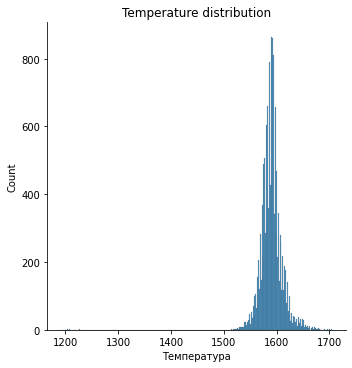

In [46]:
sns.displot(temp['Температура'])
plt.title('Temperature distribution');

In [47]:
temp[temp['Температура'] < 1300]

,key,Время замера,Температура
4883,867,2019-06-06 08:03:39,1191.0
6784,1214,2019-06-18 08:01:03,1208.0
9050,1619,2019-07-03 02:34:41,1218.0
11495,2052,2019-07-25 08:49:15,1227.0
14283,2561,2019-08-12 18:49:29,1204.0


In [48]:
arc[arc['key'].isin([867, 1214, 1619, 2052, 2561])]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
4028,867,2019-06-06 08:03:49,2019-06-06 08:06:04,1.362161,0.948663
4029,867,2019-06-06 08:19:02,2019-06-06 08:21:37,0.520198,0.391826
4030,867,2019-06-06 08:22:48,2019-06-06 08:23:47,0.558775,0.361147
4031,867,2019-06-06 08:25:21,2019-06-06 08:27:11,0.525132,0.411021
4032,867,2019-06-06 08:29:59,2019-06-06 08:33:08,0.661064,0.578344
4033,867,2019-06-06 08:36:59,2019-06-06 08:41:13,0.365236,0.292677
4034,867,2019-06-06 08:43:12,2019-06-06 08:44:19,0.852855,0.620585
5583,1214,2019-06-18 08:01:13,2019-06-18 08:02:43,0.460792,0.303613
5584,1214,2019-06-18 08:18:06,2019-06-18 08:23:35,1.177492,0.971594
5585,1214,2019-06-18 08:31:20,2019-06-18 08:32:22,0.338146,0.288641


- Здесь данные о 3216 партиях стали. Представлены все те же, что в данных об электродах, плюс 195 и 279
- Я так понимаю, температура - это наш таргет. На каком этапе мы будем ее предсказывать? На каждом этапе или финальную для партии?
- Серьезная проблема - это 19% пропусков. Заполнять пропуски в таргете конечно бессмысленно. Можно ли их запросить у бизнеса?
- Пропусков много в конце, причем есть данные первого измерения температуры, но нет последующих. Я думала, нам нужна прежде всего последняя температура, но возможно мы будем предсказывать температуру на разных этапах - это неплохо. У нас тогда больше наблюдений для обучения модели
- Температура измеряется перед каждым нагревом и после последнего. Если предсказывать температуру на каждом этапе, фичами могут быть вещества, введенные в сплав ранее, но не то, что вводилось после
- Температуры выглядят нормально распределенными в пределах 1500-1700 градусов. Есть 5 наблюдений с низкими температурами - скорее всего это не ошибки, данные замеры сделаны до первого нагрева

In [49]:
arc.shape

(14875, 5)

In [50]:
arc = arc[~arc['key'].isin([867, 1214, 1619, 2052, 2561])]
arc.shape

(14853, 5)

## Заключение

- У нас есть данные о производстве партий стали с 1 по 3241. Некоторые партии не представлены в той или иной таблице. Если тот факт, что партия не представлена в таблицах с добавками, может означать, что в сплав ничего не добавляли, то пропуск партии в данных о нагреве или продувке газом, а также в замерах температуры может быть критичным
- Температура сплава замеряется для каждой партии до первого нагрева, между нагревами и после последнего
- Каждая партия нагревается электродами от 1 до 16 раз, чаще всего 4-5 раз
- Сплав продувается газом - не совсем понятно когда - я полагаю, до первого замера и нагрева. Дан объем этого газа
- Между этапами в сплав вводятся сыпучие материалы и проволоки (15 и 9 видов соответственно). Некоторые из них применяются крайне редко - в связи с низкой диверсификацией по этим признакам предлягяю не включать их в обучающую выборку
- Пропуски, насколько я понимаю, не являются как таковым отсутствием данных. Если на пересечении партии и вещества пропуск - оно не вводилось. Заполнить пропуски нулями
- Настоящие пропуски появятся, когда мы объединим разные таблицы в один датасет, и некоторые партии представлены не во всех таблицах. Нужно понять, что с ними делать


## План работы

1. Предобработка данных

    1.1. Объединение признаков в сводный датасет: 
    
        - temp: для каждой партии найдем самое позднее время - это будет таргет - и самое раннее время - это признак и оставим только эти строки;
        - arc: посчитаем суммарную мощность для каждой партии (просто или по формуле полной мощности), суммарное время нагрева и число этапов нагрева;
        - gas, bulk и wire - без изменений. Возьму только те вещества, которые применялись более, чем для 1% партий;
        - bulk_time и wire_time - не нужны
    
    1.2. Заполнение образовавшихся пропусков (я так поняла, не будет пропусков, т.к. возьмем только те партии, которые есть во всех таблицах. Я боюсь, у нас будет очень маленький итоговый датасет)
    
    1.3. Удаление аномалий и выбросов (на самом деле уже удалила)
    
    1.4. Проверка на мультиколлинеарность
    
    (все признаки числовые, кодировать ничего не нужно)

2. Разделение на обучающую и тестовую выборки (test_size=0.25, random_state=220523)

3. Обучение моделей и подбор гиперпараметров:

        - константная, 
        - линейная регрессия, 
        - регрессия с регуляризацией, 
        - KNN,
        - SVR,
        - случайный лес, 
        - градиентный бустинг (LGBM)
        (в прошлых проектах у меня иногда хорошо срабатывал voting_regressor на основе лучших моделей, но надо смотреть по их результатам, пригодится ли голосовальщик. Можно сделать анализ ошибок)
        
4. Выбор лучшей модели и проверка ее на тестовой выборке. Анализ важности факторов

5. Выводы и отчет о работе





## Создание датасета для обучения

In [51]:
final_temp = pd.DataFrame(temp.groupby('key').max()['Время замера']).merge(temp, how='left', on=['key', 'Время замера'])


In [52]:
final_temp.isna().sum()

key               0
Время замера      0
Температура     739
dtype: int64

In [53]:
final_temp.dropna(inplace=True)
final_temp.shape

(2477, 3)

In [54]:
starting_temp = pd.DataFrame(temp.groupby('key').min()['Время замера']).merge(temp, how='left', on=['key', 'Время замера'])

In [55]:
starting_temp.isna().sum()

key             0
Время замера    0
Температура     0
dtype: int64

In [56]:
arc['total_power'] = np.sqrt(arc['Активная мощность'] ** 2 + arc['Реактивная мощность'] ** 2)
arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,total_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934


In [57]:
arc['duration'] = (arc['Конец нагрева дугой'] - arc['Начало нагрева дугой']).astype('timedelta64[s]')
arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,total_power,duration
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934,148.0


In [58]:
heating = arc.groupby('key').sum()[['total_power', 'duration']].reset_index()
heating.head()

,key,total_power,duration
0,1,3.718736,1098.0
1,2,2.588349,811.0
2,3,5.019223,655.0
3,4,3.400038,741.0
4,5,2.816980,869.0


In [59]:
start_time = arc.groupby('key').min()['Начало нагрева дугой'].reset_index().rename(columns={'Начало нагрева дугой': 'start'})
finish_time = arc.groupby('key').max()['Конец нагрева дугой'].reset_index().rename(columns={'Конец нагрева дугой': 'finish'})
cooling = start_time.merge(finish_time, how='inner', on='key')
cooling['total_time'] = (cooling['finish'] - cooling['start']).astype('timedelta64[s]')
cooling = cooling.merge(heating, how='inner', on='key')[['key', 'total_time', 'duration']]
cooling['cooling'] = (cooling['total_time'] - cooling['duration'])
cooling = cooling[['key', 'cooling']]
cooling.head()

,key,cooling
0,1,485.0
1,2,333.0
2,3,870.0
3,4,352.0
4,5,493.0


In [60]:
hrounds = pd.DataFrame(arc.groupby('key').count()['duration']).rename(columns={'duration': 'heating_rounds'}).reset_index()
hrounds.head()

,key,heating_rounds
0,1,5
1,2,4
2,3,5
3,4,4
4,5,4


In [61]:
avgpower = pd.DataFrame(arc.groupby('key').mean()['total_power']).rename(columns={'total_power': 'mean_power'}).reset_index()
avgpower.head()

,key,mean_power
0,1,0.743747
1,2,0.647087
2,3,1.003845
3,4,0.850010
4,5,0.704245


In [62]:
additives_bulk = bulk.drop(['Bulk 2', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 13'], axis=1)
additives_bulk.head()

,key,Bulk 1,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15
0,1,NaN,NaN,43.0,NaN,NaN,NaN,NaN,206.0,150.0,154.0
1,2,NaN,NaN,73.0,NaN,NaN,NaN,NaN,206.0,149.0,154.0
2,3,NaN,NaN,34.0,NaN,NaN,NaN,NaN,205.0,152.0,153.0
3,4,NaN,NaN,81.0,NaN,NaN,NaN,NaN,207.0,153.0,154.0
4,5,NaN,NaN,78.0,NaN,NaN,NaN,NaN,203.0,151.0,152.0


In [63]:
additives_wire = wire.drop(['Wire 4', 'Wire 5', 'Wire 7', 'Wire 8', 'Wire 9'], axis=1)
additives_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 6
0,1,60.059998,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN


Таблицы подготовлены, будем объединять

In [64]:
df = final_temp.merge(starting_temp, how='inner', on='key')[['key', 'Температура_x', 'Температура_y']].rename(columns={'Температура_x': 'final_temp', 'Температура_y': 'starting_temp'})
df.head()

,key,final_temp,starting_temp
0,1,1613.0,1571.0
1,2,1602.0,1581.0
2,3,1599.0,1596.0
3,4,1625.0,1601.0
4,5,1602.0,1576.0


In [65]:
df = df.merge(heating, how='inner', on='key')
df.head()

,key,final_temp,starting_temp,total_power,duration
0,1,1613.0,1571.0,3.718736,1098.0
1,2,1602.0,1581.0,2.588349,811.0
2,3,1599.0,1596.0,5.019223,655.0
3,4,1625.0,1601.0,3.400038,741.0
4,5,1602.0,1576.0,2.816980,869.0


In [66]:
df = df.merge(cooling, how='inner', on='key')
df.head()

,key,final_temp,starting_temp,total_power,duration,cooling
0,1,1613.0,1571.0,3.718736,1098.0,485.0
1,2,1602.0,1581.0,2.588349,811.0,333.0
2,3,1599.0,1596.0,5.019223,655.0,870.0
3,4,1625.0,1601.0,3.400038,741.0,352.0
4,5,1602.0,1576.0,2.816980,869.0,493.0


In [67]:
df = df.merge(hrounds, how='inner', on='key')
df.head()

,key,final_temp,starting_temp,total_power,duration,cooling,heating_rounds
0,1,1613.0,1571.0,3.718736,1098.0,485.0,5
1,2,1602.0,1581.0,2.588349,811.0,333.0,4
2,3,1599.0,1596.0,5.019223,655.0,870.0,5
3,4,1625.0,1601.0,3.400038,741.0,352.0,4
4,5,1602.0,1576.0,2.816980,869.0,493.0,4


In [68]:
df = df.merge(avgpower, how='inner', on='key')
df.head()

,key,final_temp,starting_temp,total_power,duration,cooling,heating_rounds,mean_power
0,1,1613.0,1571.0,3.718736,1098.0,485.0,5,0.743747
1,2,1602.0,1581.0,2.588349,811.0,333.0,4,0.647087
2,3,1599.0,1596.0,5.019223,655.0,870.0,5,1.003845
3,4,1625.0,1601.0,3.400038,741.0,352.0,4,0.850010
4,5,1602.0,1576.0,2.816980,869.0,493.0,4,0.704245


In [69]:
df = df.merge(gas, how='inner', on='key').rename(columns={'Газ 1': 'gas'})
df.head()

,key,final_temp,starting_temp,total_power,duration,cooling,heating_rounds,mean_power,gas
0,1,1613.0,1571.0,3.718736,1098.0,485.0,5,0.743747,29.749986
1,2,1602.0,1581.0,2.588349,811.0,333.0,4,0.647087,12.555561
2,3,1599.0,1596.0,5.019223,655.0,870.0,5,1.003845,28.554793
3,4,1625.0,1601.0,3.400038,741.0,352.0,4,0.850010,18.841219
4,5,1602.0,1576.0,2.816980,869.0,493.0,4,0.704245,5.413692


In [70]:
df = df.merge(additives_bulk, how='inner', on='key')
df.head()

,key,final_temp,starting_temp,total_power,duration,cooling,heating_rounds,mean_power,gas,Bulk 1,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15
0,1,1613.0,1571.0,3.718736,1098.0,485.0,5,0.743747,29.749986,NaN,NaN,43.0,NaN,NaN,NaN,NaN,206.0,150.0,154.0
1,2,1602.0,1581.0,2.588349,811.0,333.0,4,0.647087,12.555561,NaN,NaN,73.0,NaN,NaN,NaN,NaN,206.0,149.0,154.0
2,3,1599.0,1596.0,5.019223,655.0,870.0,5,1.003845,28.554793,NaN,NaN,34.0,NaN,NaN,NaN,NaN,205.0,152.0,153.0
3,4,1625.0,1601.0,3.400038,741.0,352.0,4,0.850010,18.841219,NaN,NaN,81.0,NaN,NaN,NaN,NaN,207.0,153.0,154.0
4,5,1602.0,1576.0,2.816980,869.0,493.0,4,0.704245,5.413692,NaN,NaN,78.0,NaN,NaN,NaN,NaN,203.0,151.0,152.0


In [71]:
df = df.merge(additives_wire, how='inner', on='key')
df.head()

,key,final_temp,starting_temp,total_power,duration,cooling,heating_rounds,mean_power,gas,Bulk 1,...,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 6
0,1,1613.0,1571.0,3.718736,1098.0,485.0,5,0.743747,29.749986,NaN,...,NaN,NaN,NaN,206.0,150.0,154.0,60.059998,NaN,NaN,NaN
1,2,1602.0,1581.0,2.588349,811.0,333.0,4,0.647087,12.555561,NaN,...,NaN,NaN,NaN,206.0,149.0,154.0,96.052315,NaN,NaN,NaN
2,3,1599.0,1596.0,5.019223,655.0,870.0,5,1.003845,28.554793,NaN,...,NaN,NaN,NaN,205.0,152.0,153.0,91.160157,NaN,NaN,NaN
3,4,1625.0,1601.0,3.400038,741.0,352.0,4,0.850010,18.841219,NaN,...,NaN,NaN,NaN,207.0,153.0,154.0,89.063515,NaN,NaN,NaN
4,5,1602.0,1576.0,2.816980,869.0,493.0,4,0.704245,5.413692,NaN,...,NaN,NaN,NaN,203.0,151.0,152.0,89.238236,9.11456,NaN,NaN


In [72]:
df.shape

(2324, 23)

In [73]:
df.fillna(0, inplace=True)
df.isna().sum()

key               0
final_temp        0
starting_temp     0
total_power       0
duration          0
cooling           0
heating_rounds    0
mean_power        0
gas               0
Bulk 1            0
Bulk 3            0
Bulk 4            0
Bulk 5            0
Bulk 6            0
Bulk 10           0
Bulk 11           0
Bulk 12           0
Bulk 14           0
Bulk 15           0
Wire 1            0
Wire 2            0
Wire 3            0
Wire 6            0
dtype: int64

In [74]:
df

,key,final_temp,starting_temp,total_power,duration,cooling,heating_rounds,mean_power,gas,Bulk 1,...,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 6
0,1,1613.0,1571.0,3.718736,1098.0,485.0,5,0.743747,29.749986,0.0,...,0.0,0.0,0.0,206.0,150.0,154.0,60.059998,0.00000,0.0,0.0
1,2,1602.0,1581.0,2.588349,811.0,333.0,4,0.647087,12.555561,0.0,...,0.0,0.0,0.0,206.0,149.0,154.0,96.052315,0.00000,0.0,0.0
2,3,1599.0,1596.0,5.019223,655.0,870.0,5,1.003845,28.554793,0.0,...,0.0,0.0,0.0,205.0,152.0,153.0,91.160157,0.00000,0.0,0.0
3,4,1625.0,1601.0,3.400038,741.0,352.0,4,0.850010,18.841219,0.0,...,0.0,0.0,0.0,207.0,153.0,154.0,89.063515,0.00000,0.0,0.0
4,5,1602.0,1576.0,2.816980,869.0,493.0,4,0.704245,5.413692,0.0,...,0.0,0.0,0.0,203.0,151.0,152.0,89.238236,9.11456,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2495,1591.0,1570.0,3.868721,723.0,485.0,4,0.967180,7.125735,0.0,...,0.0,90.0,0.0,256.0,129.0,223.0,89.150879,0.00000,0.0,0.0
2320,2496,1591.0,1554.0,5.070316,940.0,629.0,6,0.845053,9.412616,0.0,...,0.0,122.0,0.0,256.0,129.0,226.0,114.179527,0.00000,0.0,0.0
2321,2497,1589.0,1571.0,4.360918,569.0,255.0,3,1.453639,6.271699,0.0,...,0.0,0.0,0.0,230.0,124.0,226.0,94.086723,9.04800,0.0,0.0
2322,2498,1594.0,1591.0,3.909917,750.0,608.0,5,0.781983,14.953657,0.0,...,0.0,101.0,0.0,206.0,129.0,207.0,118.110717,0.00000,0.0,0.0


## Проверка на мультиколлинеарность

In [75]:
corr = df.corr()
corr

,key,final_temp,starting_temp,total_power,duration,cooling,heating_rounds,mean_power,gas,Bulk 1,...,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 6
key,1.000000,-0.096041,-0.015720,-0.019401,-0.025996,-0.009792,-0.030347,0.010663,-0.038146,-0.073454,...,0.006202,0.062899,0.034931,0.032906,-0.107336,-0.046039,-0.015067,0.046471,-0.027304,-0.008255
final_temp,-0.096041,1.000000,0.301178,0.172150,0.275836,0.049321,0.177468,0.037424,0.051238,-0.092365,...,-0.181696,0.061610,-0.114715,0.264818,0.110305,0.267969,0.320409,-0.212611,-0.047489,-0.084025
starting_temp,-0.015720,0.301178,1.000000,-0.156262,-0.389299,0.258448,-0.180745,-0.005733,0.031481,0.074234,...,-0.127062,0.035978,-0.110332,-0.087467,-0.184944,-0.061371,0.264719,-0.104556,-0.003320,0.020822
total_power,-0.019401,0.172150,-0.156262,1.000000,0.716294,0.505473,0.882029,0.470094,0.359327,0.072085,...,0.134222,0.010250,0.066021,0.272365,0.289945,0.172557,0.144020,0.052736,0.055623,0.056095
duration,-0.025996,0.275836,-0.389299,0.716294,1.000000,0.465850,0.796460,0.046927,0.383114,0.072539,...,0.163289,-0.004742,0.078984,0.455692,0.452931,0.300501,0.061758,0.043421,0.033793,0.042741
cooling,-0.009792,0.049321,0.258448,0.505473,0.465850,1.000000,0.561429,0.018507,0.407956,0.126666,...,0.140459,-0.002237,0.022315,0.149563,0.118267,0.082692,0.158066,0.046646,0.071072,0.150539
heating_rounds,-0.030347,0.177468,-0.180745,0.882029,0.796460,0.561429,1.000000,0.032455,0.392239,0.068883,...,0.153849,0.013238,0.063382,0.292137,0.324592,0.178624,0.144372,0.067920,0.055874,0.053980
mean_power,0.010663,0.037424,-0.005733,0.470094,0.046927,0.018507,0.032455,1.000000,0.040633,0.021248,...,-0.001185,-0.008711,0.016934,0.040080,0.018510,0.039370,0.039621,-0.014954,0.019940,0.009156
gas,-0.038146,0.051238,0.031481,0.359327,0.383114,0.407956,0.392239,0.040633,1.000000,0.181154,...,0.144704,-0.007736,0.043824,0.178410,0.249463,0.050567,0.131994,0.084350,0.106388,0.111197
Bulk 1,-0.073454,-0.092365,0.074234,0.072085,0.072539,0.126666,0.068883,0.021248,0.181154,1.000000,...,-0.001353,-0.022860,-0.038616,0.279554,0.180043,0.008270,0.030152,-0.043382,0.021982,0.156604


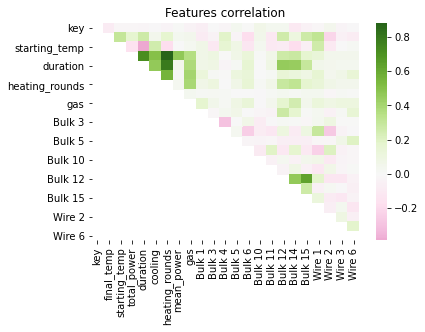

In [76]:
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
sns.heatmap(corr, cmap='PiYG', center=0)
plt.title('Features correlation');

Общая мощность сильно коррелирует (0.88) с количеством этапов нагревания. Все остальные корреляции меньше 0.5

Убрала количество этапов - у первых, линейных моделей результат незначительно улучшился

## Разделение на обучающую и тестовую выборки

In [77]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 220523

y = df['final_temp']
X = df.drop(['final_temp', 'heating_rounds', 'key'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

for item in [X_train, X_test, y_train, y_test]:
    print(item.shape)

(1743, 20)
(581, 20)
(1743,)
(581,)


## Обучение моделей

In [78]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor

models = ['dummy', 'linreg', 'linreg_regularized', 'knn', 'svr', 'random_forest', 'lgbm']
scores = []

dummy = DummyRegressor(strategy='median')
dummy_score = -np.mean(cross_val_score(dummy, X_train, y_train, scoring='neg_mean_absolute_error', cv=5))
print(dummy_score)
scores.append(dummy_score)

8.108767249613015


In [79]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

linreg = make_pipeline(StandardScaler(), LinearRegression())
linreg_score = -np.mean(cross_val_score(linreg, X_train, y_train, scoring='neg_mean_absolute_error', cv=5))
print(linreg_score)
scores.append(linreg_score)

5.989035131454464


In [80]:
linreg_pipe = Pipeline(
    [
        ('scaler', StandardScaler),
        ('regressor', LinearRegression())
    ]
)

param_grid = [{
    'scaler': [
            StandardScaler(),
            MinMaxScaler()
        ],
    'regressor':[
        LinearRegression()
    ]},
    {'scaler': [
            StandardScaler(),
            MinMaxScaler()
        ],
    'regressor':[
        Ridge()
    ],
    'regressor__alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 3, 5, 10, 50, 100]
    },
    {'scaler': [
            StandardScaler(),
            MinMaxScaler()
        ],
    'regressor':[
        Lasso()
    ],
    'regressor__alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 3, 5, 10, 50, 100]
    },
    {'scaler': [
            StandardScaler(),
            MinMaxScaler()
        ],
    'regressor':[
        ElasticNet()
    ],
    'regressor__alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 3, 5, 10, 50, 100],
    'regressor__l1_ratio': [0.01, 0.05, 0,1, 0.2, 0.3, 0.5, 0.8, 0.9, 0.95, 0.99, 1]
}]

linreg_grid = GridSearchCV(linreg_pipe, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=False)
linreg_grid.fit(X_train, y_train)
linreg_grid.best_params_

{'regressor': ElasticNet(alpha=0.1, l1_ratio=0.99),
 'regressor__alpha': 0.1,
 'regressor__l1_ratio': 0.99,
 'scaler': StandardScaler()}

In [81]:
linreg_reg = linreg_grid.best_estimator_
linreg_reg_score = -np.mean(cross_val_score(linreg, X_train, y_train, scoring='neg_mean_absolute_error', cv=5))
print(linreg_reg_score)
scores.append(linreg_reg_score)

5.989035131454464


Улучшение в 0.02 по сравнению с обычной линейной регрессией

In [82]:
from sklearn.neighbors import KNeighborsRegressor

knn_pipe = Pipeline(
    [
        ('scaler', StandardScaler),
        ('regressor', KNeighborsRegressor())
    ]
)

param_grid = {
    'scaler': [
            StandardScaler(),
            MinMaxScaler()
        ],
    'regressor__n_neighbors': list(range(1, 21))
    }

knn_grid = GridSearchCV(knn_pipe, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=False)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'regressor__n_neighbors': 18, 'scaler': StandardScaler()}

In [83]:
knn = knn_grid.best_estimator_
knn_score = -np.mean(cross_val_score(knn, X_train, y_train, scoring='neg_mean_absolute_error', cv=5))
print(knn_score)
scores.append(knn_score)

7.089597993903402


Результат хуже, чем у линейной регрессии

In [84]:
from sklearn.svm import SVR

svr_pipe = Pipeline(
    [
        ('scaler', StandardScaler),
        ('regressor', SVR())
    ]
)

param_grid = {
    'scaler': [
            StandardScaler(),
            MinMaxScaler()
        ],
    'regressor__C': [10, 20, 30, 40, 50, 60, 70, 80],
    'regressor__epsilon': [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
    }

svr_grid = GridSearchCV(svr_pipe, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=False)
svr_grid.fit(X_train, y_train)
svr_grid.best_params_

{'regressor__C': 20, 'regressor__epsilon': 1.25, 'scaler': MinMaxScaler()}

In [85]:
svr = svr_grid.best_estimator_
svr_score = -np.mean(cross_val_score(svr, X_train, y_train, scoring='neg_mean_absolute_error', cv=5))
print(svr_score)
scores.append(svr_score)

5.875732051210354


5.88 - это пока лучший результат

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Ячейка закомментирована, чтобы снова не выполнялась. Результаты записаны в конце

# forest = RandomForestRegressor(random_state=RANDOM_STATE)

# param_grid = {
#     'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
#     'max_depth': [int(x) for x in np.linspace(start=1, stop=15, num=15)],
#     'min_samples_split': [int(x) for x in np.linspace(start=2, stop=50, num=10)],
#     'min_samples_leaf': [int(x) for x in np.linspace(start=2, stop=50, num=10)]
#     }

# forest_grid = RandomizedSearchCV(forest, param_grid, n_iter=200, scoring='neg_mean_absolute_error', cv=5, verbose=10, random_state=RANDOM_STATE)
# forest_grid.fit(X_train, y_train)
# forest_grid.best_params_

# {'n_estimators': 200,
#  'min_samples_split': 2,
#  'min_samples_leaf': 2,
#  'max_depth': 12}

In [87]:
# rs_df = pd.DataFrame(forest_grid.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
# rs_df = rs_df.drop([
#     'mean_fit_time',
#     'std_fit_time',
#     'mean_score_time',
#     'std_score_time',
#     'params',
#     'split0_test_score',
#     'split1_test_score',
#     'split2_test_score',
#     'split3_test_score',
#     'split4_test_score',
#     'std_test_score'],
#     axis=1)
# rs_df.head(10)

In [88]:
# Ячейка закомментирована, чтобы снова не выполнялась. Результаты записаны в конце

# forest = RandomForestRegressor(random_state=RANDOM_STATE)

# param_grid = {
#     'n_estimators': [200, 300, 400, 500, 600],
#     'max_depth': [9, 12, 15],
#     'min_samples_split': [2, 8, 14, 18, 23, 28],
#     'min_samples_leaf': [2]
#     }

# forest_grid = GridSearchCV(forest, param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=10)
# forest_grid.fit(X_train, y_train)
# forest_grid.best_params_

# {'max_depth': 15,
#  'min_samples_leaf': 2,
#  'min_samples_split': 8,
#  'n_estimators': 500}

In [89]:
# gs_df = pd.DataFrame(forest_grid.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
# gs_df = gs_df.drop([
#     'mean_fit_time',
#     'std_fit_time',
#     'mean_score_time',
#     'std_score_time',
#     'params',
#     'split0_test_score',
#     'split1_test_score',
#     'split2_test_score',
#     'split3_test_score',
#     'split4_test_score',
#     'std_test_score'],
#     axis=1)
# gs_df.head(10)

In [90]:
forest = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=500, min_samples_leaf=2, min_samples_split=8, max_depth=15)
forest_score = -np.mean(cross_val_score(forest, X_train, y_train, scoring='neg_mean_absolute_error', cv=5))
print(forest_score)
scores.append(forest_score)

6.17067272747059


Больше часа времени на подбор гиперпараметров в два этапа - а результат хуже метода опорных векторов: 6.17

In [ ]:
import lightgbm as lgbm
from sklearn.metrics import mean_absolute_error

# validation set required
X_train_train, X_eval, y_train_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE)
eval_set = [(X_eval, y_eval)]

lgbm_reg = lgbm.LGBMRegressor(n_estimators=10000, random_state=1234)
lgbm_reg.fit(
    X_train_train, 
    y_train_train,
    eval_set=eval_set,
    early_stopping_rounds=100,
    verbose=100
)

preds = lgbm_reg.predict(X_eval)
lgbm_score = mean_absolute_error(y_eval, preds)
print(lgbm_score)
scores.append(lgbm_score)

5.88 - одинаковый результат с SVR

In [ ]:
import optuna
from optuna.integration import LightGBMPruningCallback
from optuna.visualization.matplotlib import plot_param_importances

In [ ]:
def objective(trial, data=X_train, target=y_train):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=RANDOM_STATE)
    param = {
        'metric': 'mae', 
        'random_state': RANDOM_STATE,
        'n_estimators': 20000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.2, 0.95, step=0.1)
    }
    model = lgbm.LGBMRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=1000)
    
    preds = model.predict(test_x)
    
    mae = mean_absolute_error(test_y, preds)

    trial.set_user_attr(key="best_booster", value=model)
    
    return mae

def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])


if __name__ == "__main__":
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction='minimize'
    )
    study.optimize(objective, n_trials=100, callbacks=[callback])
    best_model=study.user_attrs["best_booster"]

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

In [ ]:
lgbm_reg = best_model

preds = lgbm_reg.predict(X_eval)
print(mean_absolute_error(y_eval, preds))

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
params=study.best_params   
params['random_state'] = RANDOM_STATE
params['n_estimators'] = 20000 
params['metric'] = 'mae'
params

In [ ]:
models_scores = pd.DataFrame({'model': models, 'MAE': scores}).sort_values(by='MAE')
models_scores

На обучающей выборке с применением кросс-валидации был опробован ряд моделей. Результаты представлены в таблице выше. Все модели, за исключением константной и метода ближайших соседей, попадают в заданное значение метрики МАЕ, не более 6.8. Однако прежде, чем делать выводы, модель нужно протестировать на данных, которых она не видела - на тестовой выборке

## Тестирование лучшей модели

Поскольку с настройкой гиперпараметров LGBM у меня проблемы, будем считать лучшей моделью SVR. Протестируем ее на тестовой выборке

In [ ]:
preds = svr.predict(X_test)
print(mean_absolute_error(y_test, preds))

Значение метрики лучше, чем на кросс-валидации: 5.81. Задачу можно считать выполненной

In [ ]:
from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(svr, X_train, y_train, scoring='neg_mean_absolute_error')
# get importance
importance = pd.DataFrame(results.importances_mean, index=X_train.columns)

In [ ]:
importance.reset_index().rename(columns={'index': 'feature', 0: 'importance'}).sort_values(by='importance', ascending=False)

Наиболее значимыми для предсказания итоговой температуры сплава являются продолжительность нагревания, начальная температура и продолжительность остывания

## Заключение

В ходе проекта по предсказанию температуры сплава были выполнены следующие задачи и достигнуты такие результаты:
- Итоговый датасет для обучения был собран на основе 5 из 7 доступных нам таблиц. Мы не использовали данные по времени введения присадок.
- В итоговый датасет попали только те партии стали, по которым была информация во всех таблицах - так мы получили максимально данные, без пропусков, однако ценой максимального сокращения выборки (2324 строки, из них 1743 для обучения моделей)
- Данные по присадкам и газу были взяты в неизменном виде, включены только присадки с достаточной вариативностью (используются не менее, чем для 1% партий)
- Данные по мощности и времени нагрева были агрегированы (поскольку каждая партия представлена в исходных таблицах несколькими строками), учтены общая мощность, время нагрева, время остывания сплава, начальная температура
- По результатам проверки на мультиколлинеарность был исключен признак числа этапов нагревания. У него была высокая корреляция с продолжительностью нагревания
- Также был исключен номер партии, как неинформативный признак. Это улучшило результаты линейных моделей, однако несколько ухудшило метрику SVR, финалиста, и не повлияло на случайный лес и KNN
- На полученных признаках были обучены модели:

        - константная, 
        - линейная регрессия, 
        - регрессия с регуляризацией (ElasticNet), 
        - KNN,
        - SVR,
        - случайный лес, 
        - градиентный бустинг (LGBM)

- Метод опорных векторов показал лучший результат на кросс-валидации, МАЕ=5.88, и еще лучший на тестовой выборке, МАЕ=5.81. При цели в 6.8, на мой взгляд, это достаточно хороший показатель
- Наиболее значимыми для предсказания итоговой температуры сплава можно признать такие признаки, как продолжительность нагревания, начальная температура и продолжительность остывания